<a href="https://www.kaggle.com/code/aisuko/time-series-forecasting-with-bayesian-regression?scriptVersionId=199798698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Bayesian ridge regression stands as a powerful and versatile technique. It's a Bayesian approach to linear regression that offers a unique perspective on modeling and prediction.


# Bayesian Ridge Regression

Ridge regression is a linear regression technique designed to tackle the issue of multicollinearity in predictive modeling. It addresses the issue that traditional linear regression models can become unstable on predictors features in a dataset that the predictors(features) are highly correlated with a regularization term(**L2 penalty**) to the linear regression objective function.

# Machine learning for time series

The key advantage of machine learning for time series predictions lies in its adaptability and scalability. These models can learn from large datasets, automatically detect patterns and trends, and adapt to changing conditions, making them invaluable for real-word applications.

# Load time series dataset

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pandas_datareader as pdr

# Define the date range
start_date = '1960-01-01'
end_date = '2020-01-01'

# Fetch the S&P 500 data and drop any missing values
data = pdr.get_data_fred('SP500', start=start_date, end=end_date).dropna()

# Create a Plotly line plot to visualize the time series
fig = go.Figure()

# Add trace for the S&P 500 data
fig.add_trace(go.Scatter(x=data.index, y=data['SP500'], mode='lines', name='S&P 500'))

# Customize the layout
fig.update_layout(
    title='S&P 500 Index',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    autosize=False,
    width=1000,
    height=500
)

# Show the plot
fig.show()

# Preprocessing data

We will split the data to train and test.

In [2]:
def data_preprocessing(data, num_lags, train_test_split):
    x=[]
    y=[]
    for i in range(len(data)-num_lags):
        x.append(data[i:i+num_lags])
        y.append(data[i+num_lags])
    # convert the data to numpy arrays
    x=np.array(x)
    y=np.array(y)
    
    # split the data into training and testing sets
    split_index=int(train_test_split*len(x))
    x_train=x[:split_index]
    y_train=y[:split_index]
    x_test=x[split_index:]
    y_test=y[split_index:]
    
    return x_train, y_train, x_test, y_test

start_date='1960-01-01'
end_date='2020-01-01'

# set the time index if it's not already set
data = (pdr.get_data_fred('SP500', start = start_date, end = end_date).dropna())
# Perform differencing to make the data stationary
data_diff = data.diff().dropna()
# You can choose an appropriate split point based on your data
data_diff = np.reshape(np.array(data_diff), (-1))
x_train, y_train, x_test, y_test = data_preprocessing(data_diff, 100, 0.80)

# Train the model

In [3]:
# Create and train the Bayesian Ridge model
model = BayesianRidge()
model.fit(x_train, y_train)

# Predicting in-sample
y_predicted_train = np.reshape(model.predict(x_train), (-1, 1))
# Predicting out-of-sample
y_predicted = np.reshape(model.predict(x_test), (-1, 1))
# Step 6: Evaluate the model's performance
# Calculate evaluation metrics (e.g., RMSE, MAE, etc.)
rmse_train = math.sqrt(mean_squared_error(y_predicted_train, y_train))
rmse_test = math.sqrt(mean_squared_error(y_predicted, y_test))

print(f"RMSE of Training: {rmse_train}")
print(f"RMSE of Test: {rmse_test}")

RMSE of Training: 19.967693585994898
RMSE of Test: 21.7073641520149


# Visualization the result

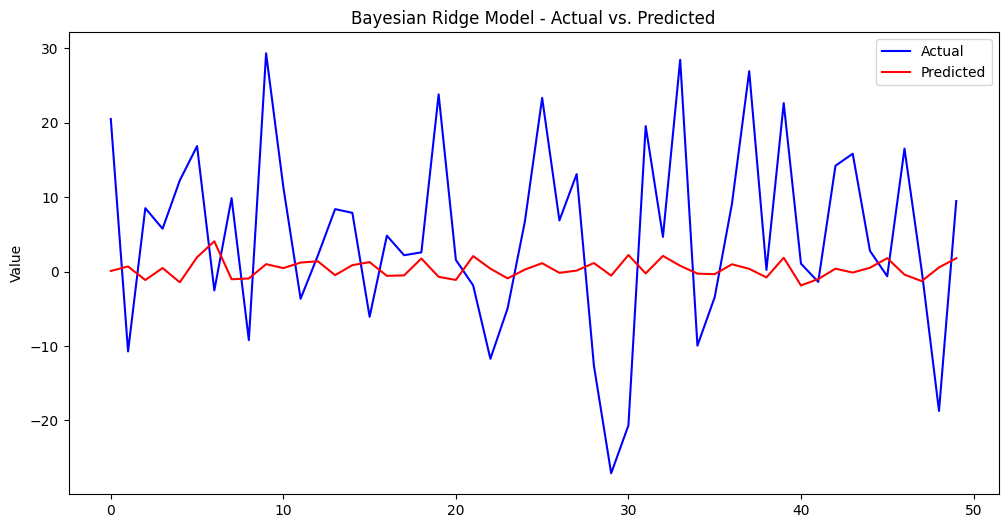

In [4]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test[-50:], label = 'Actual', color = 'blue')
plt.plot(y_predicted[-50:], label = 'Predicted', color = 'red')
plt.legend()
plt.title('Bayesian Ridge Model - Actual vs. Predicted')
plt.ylabel('Value')
plt.show()

# Acknowledgement

* https://medium.com/gopenai/time-series-forecasting-with-bayesian-regression-efe97cb0e4b3